In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [69]:
# Show first five rows 

url = 'import_dependency.csv'
dataset = pd.read_csv(url, header=0)
dataset.head()

,freq,siec,unit,geo,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,A,TOTAL,PC,AL,35.658,15.626,25.300,28.716,12.593,20.128,38.126,20.967,31.546,35.876
1,A,TOTAL,PC,AT,69.976,63.782,61.261,65.620,60.371,62.099,63.928,64.231,71.623,58.324
2,A,TOTAL,PC,BA,:,:,:,28.209,33.693,31.518,34.031,24.263,27.377,25.410
3,A,TOTAL,PC,BE,76.463,76.564,77.777,80.102,84.146,75.890,75.257,82.969,77.592,78.055
4,A,TOTAL,PC,BG,36.732,36.853,38.319,35.172,36.446,38.472,39.362,36.325,38.104,37.882


In [92]:
# Učitava podatke za odabranu zemlju IT, HR, FR, UK, ES

country = "HR"

# Prebacivanje podataka u array radi lakšeg manipuliranja podatcima

total = dataset[dataset.geo == country].to_numpy()
for i in total:
    array = i

skip = ['A', 'TOTAL', 'PC', country]
count = 0

percentage_hr = []
percentage_it = []
percentage_fr = []
percentage_uk = []
percentage_es = []

for i in array:
    count = 0
    for j in skip:
        if i == j:
            break
        count += 1
        if count == len(skip):
            if isinstance(i,float):
                percentage_hr.append(i)
            elif isinstance(i, str):
                percentage_hr.append(float(i))
print("croatia percentage:", percentage_hr)

## Španjolska

country = "ES"

skip = ['A', 'TOTAL', 'PC', country]
count = 0

total = dataset[dataset.geo == country].to_numpy()
for i in total:
    array = i
    
for i in array:
    count = 0
    for j in skip:
        if i == j:
            break
        count += 1
        if count == len(skip):
            if isinstance(i,float):
                percentage_es.append(i)
            elif isinstance(i, str):
                percentage_es.append(float(i))
print("spain percentage:", percentage_es)

## Italija

country = "IT"

skip = ['A', 'TOTAL', 'PC', country]
count = 0

total = dataset[dataset.geo == country].to_numpy()
for i in total:
    array = i
    
for i in array:
    count = 0
    for j in skip:
        if i == j:
            break
        count += 1
        if count == len(skip):
            if isinstance(i,float):
                percentage_it.append(i)
            elif isinstance(i, str):
                percentage_it.append(float(i))
print("italy percentage:", percentage_it)


## Ujedinjeno Kraljevstvo

country = "UK"

skip = ['A', 'TOTAL', 'PC', country]
count = 0

total = dataset[dataset.geo == country].to_numpy()
for i in total:
    array = i

c = 0
for i in array:
    c+=1
    count = 0
    for j in skip:
        if i == j:
            break
        count += 1
        if count == len(skip):
            if isinstance(i,float):
                percentage_uk.append(i)
            elif isinstance(i, str):
                try:
                    percentage_uk.append(float(i))
                except:
                    # if ":" use value from year before to keep arrays same length to compare
                    percentage_uk.append(array[c-2])
print("uk percentage:", percentage_uk)

## Francuska

country = "FR"

skip = ['A', 'TOTAL', 'PC', country]
count = 0

total = dataset[dataset.geo == country].to_numpy()
for i in total:
    array = i

c = 0
for i in array:
    c+=1
    count = 0
    for j in skip:
        if i == j:
            break
        count += 1
        if count == len(skip):
            if isinstance(i,float):
                percentage_fr.append(i)
            elif isinstance(i, str):
                try:
                    percentage_fr.append(float(i))
                except:
                    # if ":" use value from year before to keep arrays same length to compare
                    percentage_fr.append(array[c-2])
print("france percentage:", percentage_fr)

# Kao rezultat dobijemo niz podataka za svaku zemlju 

croatia percentage: [49.639, 49.862, 47.434, 44.206, 48.786, 48.43, 53.152, 52.691, 56.216, 53.589]
spain percentage: [76.012, 72.798, 69.997, 72.557, 72.741, 71.486, 73.866, 73.613, 75.032, 67.89]
italy percentage: [81.353, 79.109, 76.736, 75.811, 77.03, 77.653, 76.979, 76.33800000000001, 77.484, 73.454]
uk percentage: [36.942, 43.387, 47.758, 46.773, 37.638000000000005, 35.639, 35.575, 35.513000000000005, 34.829, 34.829]
france percentage: [49.052, 48.204, 48.021, 46.243, 45.933, 47.398999999999994, 48.797, 46.843999999999994, 47.556000000000004, 44.463]


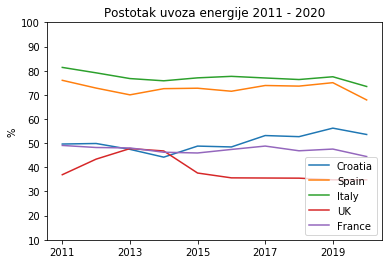

In [111]:
# Years of observation 2011 - 2020

years = []

for i in range(10):
    years.append(str(i+2011))

croatia = percentage_hr
spain = percentage_es
italy = percentage_it
uk = percentage_uk
france = percentage_fr

# Crtanje grafa koji prikazuje postotak uvoza energije po zemlji 2011-2020

result = pd.DataFrame({
                            'Croatia': croatia, 
                            'Spain': spain,
                            'Italy': italy,
                            'UK': uk,
                            'France': france
                        }
                        ,index=years)

ax = result.plot()

plt.ylim(10, 100)
plt.legend(loc='lower right')
plt.ylabel("%")
plt.title("Postotak uvoza energije 2011 - 2020")
plt.show()

In [112]:
ax.figure.savefig('ovisnost_zemalja_o_uvozu.pdf')